In [1]:
# Setting dependencies
import math
import numpy as np
from numpy import arccos, dot
from numpy.linalg import norm, inv
import matplotlib.pyplot as plt
import seaborn as sbn
import pandas as pd

Be sure your functions work for vectors with a size of three and matrices that are 3x3. Bonus points if you can further generalize them for larger vectors and matrices.

1. Write a function angle_between(v1,v2) where v1 and v2 are two vectors that are passed in, and the angle between them is calculated.

Here I need to calculate the angle theta by using the dot product. 
Since we are taking the inner product of two 1xN vectors, we have to transpose the second one into an Nx1 row so that the result is a scalar and not an NxN matrix. We divide by the Euclidean norms of the vectors to standardize them to unit vectors. 

In [2]:
#v_1 = np.random.rand(1,3)
#v_2 = np.random.rand(1,3)
#print(v_1, v_2)

v_1 = np.array([[10,9,3]])
v_2 = np.array([[2,5,12]])


def angle_between(v1,v2):
    theta = arccos(dot(v1, v2.T)/(norm(v1)*norm(v2)))
    return theta

angle_between(v_1,v_2)


array([[0.97992471]])

2. Write a function called row_dot (A, r1, r2) that takes an input matrix called A, one row number identified by r1, and another row number identified by r2, and returns the dot product of the r1 and r2 rows (indexing starts at 0).

In [3]:
# Creating matrix M
M = np.matrix('8, 14, -6; 12,7,4; -11,3,21')
#print(M)

# In the function call, I specify each row by the matrix index

def row_dot(A, r1, r2):
    dot_prod = dot(r1, r2.T)
    return dot_prod

row_dot(M,M[0],M[1])

matrix([[170]])

3. Write a function matrix_division(m1, m2) that takes in two matrices, m1 and m2, and returns the result. What is the trick with matrix division?

There's no such thing as matrix "division" in linear algebra. Instead, the equivalent is the  multiplication of one matrix with the inverse of the other. Since matrix multiplication operates left-wise, if we want to divide M1 by M2, we have to find the inverse of M2 (M2^-1) and then left-multiply it by M1: M1*M2^-1.  So first, the function must compute the inverse of the second parameter, then perform the matrix multiplication.

In [4]:
# Creating matrices M1, M2, calculating inverse, and performing LH multiplication with inverse to get results:

M1 = np.matrix('6,3,1; -1,7,4; -2,8,5')
M2 = np.matrix('-3,0,1; -1,-4,4; 6,-2,2')
#print(M1)
#print(M2)
#print(M1@M2)

M2_inv = inv(M2)
#print(M2_inv)

print(M1@M2_inv)


[[ 4.         -2.07692308  2.65384615]
 [11.         -4.07692308  4.65384615]
 [13.         -4.69230769  5.38461538]]


In [5]:
# Let's try a function now:

def matrix_division(m1,m2):
    
    # First, we have to compute the inverse of m2
    m2_inv = inv(m2)
    
    # Next, we take the "quotient" by left-multiplying the inverse of m2 by m1
    
    quotient = m1@m2_inv
    
    return quotient

matrix_division(M1,M2)
    

matrix([[ 4.        , -2.07692308,  2.65384615],
        [11.        , -4.07692308,  4.65384615],
        [13.        , -4.69230769,  5.38461538]])

4. Write a function is_orthogonal(v1, v2, tol), where v1 and v2 are column vectors of the same size and tol is a scalar value strictly larger than 0. The output should be 1 if the angle between v1 and v2 is within tol of pi/2, that is, |pi/2 - theta| < tol (or -tol < (pi/2 - theta) < tol) , and 0 otherwise.  

In [6]:
# Test cases for problem 4
a1 = np.array([[1], [0.001]])
b1 = np.array([[0.001], [1]])
# output: 1
#is_orthogonal(a,b, 0.01)

# output: 0
#is_orthogonal(a,b, 0.001)

# output: 0
a2 = np.array([[1], [0.001]])
b2 = np.array([[1], [1]])
#is_orthogonal(a,b, 0.01)

# output: 1
a3 = np.array([[1], [1]])
b3 = np.array([[-1], [1]])
#is_orthogonal(a,b, 1e-10)


In [7]:
def is_orthogonal(v1,v2, tol):
    
    # Takes two same-sized vectors and a tolerance level 
    #and determines if the vectors are orthogonal, within a given tolerance.
    
    # The function returns '1' if the vectors are orthogonal, 
    # otherwise it returns '0' (false).
    
    # Since we are taking the inner product of two 1xN vectors, we have to transpose
    # the first one into an Nx1 row so that the result is a scalar and not an NxN matrix.
    
    # calculates the angle between two vectors in radians
    theta = arccos(dot(v1.T, v2)/(norm(v1)*norm(v2)))
    
    # checks to see if angle is within tolerance: 
    if abs(math.pi/2-theta) < tol:
        return 1
    
    else:
        return 0
       

In [8]:
# Test case 1:
is_orthogonal(a1,b1, 0.01)

1

In [9]:
# Test case 2:
is_orthogonal(a1,b1, 0.001)

#So vectors a1 and b1 are orthogonal when the tolerance is 0.01; at the 0.001 tolerance level, they are not. 

0

In [10]:
# Test case 3:
is_orthogonal(a2,b2,.01)

0

In [11]:
# Test case 4:
is_orthogonal(a3,b3, 1e-10)

1

5.	Create a class called vector_calculator. __init__ should take self, vector1, and vector2. It should have two methods inside of it that are from problems 1 and 4 above (angle_between and is_orthogonal). Make sure tol is defaulted but can be overwritten. Make sure you can call angle_between and is_orthogonal through the class and return the correct results as in problems 1 and 4. 

In [12]:
class Vector_calculator():
        
    #init method or constructor
    def _init_(self, vector1, vector2, tol): # creates a Vector_calculator object
        
        # instance variables
        self.vector1 = vector1
        self.vector2 = vector2
        self.tol = tol
    
    # Regular (instance) methods. Applies to all instances of Vector_calculator.
    
    # First method: calculating the angle between vectors
    def angle_between1(self, vector1, vector2):
            theta1 = arccos(dot(vector1, vector2.T)/(norm(vector1)*norm(vector2)))
            return theta1
    
    # Second method: determining if two vectors are orthogonal
    
    # The function returns '1' if the vectors are orthogonal, 
    # otherwise it returns '0' (false).
    def is_orthogonal1(self, vector1, vector2, tol=0.01):
        # calculates the angle between two vectors in radians
        theta2 = arccos(dot(vector1.T, vector2)/(norm(vector1)*norm(vector2)))
    
        # checks to see if angle is within tolerance: 
        if abs(math.pi/2-theta2) < tol:
            return 1
           
        else:
            return 0
         
        

In [13]:
test = Vector_calculator()

test.angle_between1(v_1,v_2)

array([[0.97992471]])

In [14]:
test.is_orthogonal1(a1,b1)

1

6. Show a graphical representation of the breast cancer data outlined in this reading. https://www.datacamp.com/community/tutorials/principal-component-analysis-in-python. Be sure to describe what PCA is and incorporate the principal components in your plot. This is just exploratory, so there are many correct answers.

I followed the framework of the tutorial. I opted to create 3 principal components and then create pairwise plots to look at the variation in the data set among the three components (since I don't know how to plot in 3D yet). 

In [15]:
# getting the data set

from sklearn.datasets import load_breast_cancer

In [16]:
breast = load_breast_cancer()

In [17]:
breast_data = breast.data

In [18]:
breast_data.shape

(569, 30)

In [19]:
breast_labels = breast.target
breast_labels.shape

(569,)

In [20]:
# Reshaping breast_labels to concatenate with breast_data; we want to create a dataframe
labels = np.reshape(breast_labels, (569,1))

In [21]:
final_breast_data = np.concatenate([breast_data, labels], axis = 1)

In [22]:
final_breast_data.shape

(569, 31)

In [23]:
# creating the dataframe

breast_dataset = pd.DataFrame(final_breast_data)

In [24]:
features = breast.feature_names

In [25]:
features

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [26]:
# Adding a 'label' field, as our diagnoses (categorical, 2-state) is not labeled; we'll need to equate array with column names of dataframe
features_labels = np.append(features, 'label')


In [27]:
#embed column names into breast_dataset df:
breast_dataset.columns = features_labels

In [28]:
breast_dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [29]:
# Specifying classification of "label" values to categorical diagnostic states ("benign" and "malignant"); we want to permanently alter the df, so we'll use inplace - True
breast_dataset['label'].replace(0, 'Benign', inplace = True)
breast_dataset['label'].replace(1, 'Malignant', inplace = True)

In [30]:
breast_dataset.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,Benign
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,Benign
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,Benign
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,Benign
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,Malignant


In [31]:
from sklearn.preprocessing import StandardScaler
x = breast_dataset.loc[:, features].values
x = StandardScaler().fit_transform(x) # normalizing the features

# The first step is to rescale all of the data to a Standard Normal Gaussian - 
# this allows us to make direct comparisons of variances among variables (as they're, 
# loosely speaking, 'equally weighted'. 

# One of the inviolable underlying assumptions of PCA is that the random variables are 
# normally distributed, and of equal variance. Rescaling by standardization assures 
# that this condition is met.

In [32]:
x.shape

(569, 30)

In [33]:
# Check to verify that normalized data has a mean of zero, standard deviation of one:

np.mean(x), np.std(x)

(-6.826538293184326e-17, 1.0)

In [34]:
# pretty dang close to zero.
# converting normalized features into a tabular format

feat_cols = ['feature' + str(i) for i in range(x.shape[1])]


In [35]:
normalized_breast = pd.DataFrame(x, columns = feat_cols)

In [36]:
# Peeping the normalized dataframe.

normalized_breast.tail()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635
568,-1.808401,1.221792,-1.814389,-1.347789,-3.112085,-1.150752,-1.114873,-1.261820,-0.820070,-0.561032,...,-1.410893,0.764190,-1.432735,-1.075813,-1.859019,-1.207552,-1.305831,-1.745063,-0.048138,-0.751207


In [37]:
# Importing the PCA functions, and selecting 3 components.

from sklearn.decomposition import PCA

pca_breast = PCA(n_components = 3)
principalComponents_breast = pca_breast.fit_transform(x)

#WHAT DOES THE FIT_TRANSFORM MEAN/DO?

In [38]:
# Creating DF that will have PC values for all 569 samples

principal_breast_df = pd.DataFrame(data = principalComponents_breast, columns = ['principal component 1', 'principal component 2', 'principal component 3'])

In [39]:
principal_breast_df.tail()

,principal component 1,principal component 2,principal component 3
564,6.439315,-3.576818,2.459487
565,3.793382,-3.584048,2.088476
566,1.256179,-1.902296,0.562730
567,10.374794,1.672010,-1.877030
568,-5.475243,-0.670638,1.490447


In [40]:
# What proportion of variance in the sample data is distributed along each component?

print('Explained variation per principal component: {}'.format(pca_breast.explained_variance_ratio_))

Explained variation per principal component: [0.44272026 0.18971182 0.09393163]


<Figure size 432x288 with 0 Axes>

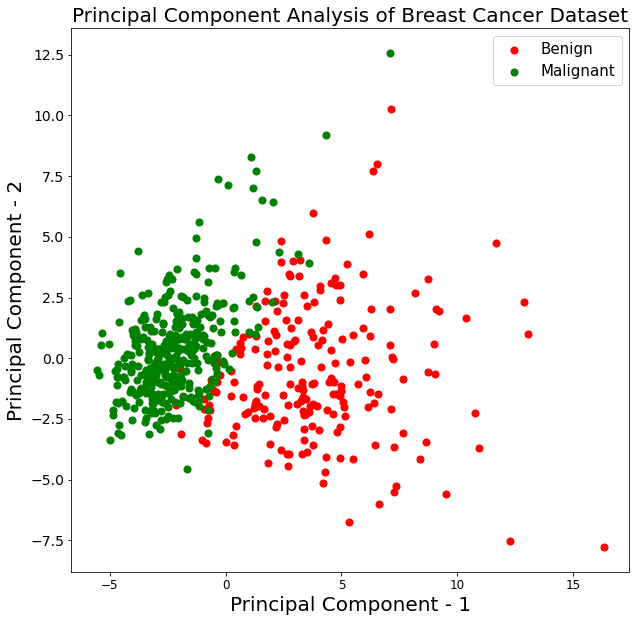

In [41]:
# Now for the plotting:
# I've made three pairwise plots: PC-1 and PC-2; PC-2 and PC-3; PC-1 and PC-3

plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1', fontsize = 20)
plt.ylabel('Principal Component - 2', fontsize = 20)
plt.title('Principal Component Analysis of Breast Cancer Dataset', fontsize = 20)
targets = ['Benign', 'Malignant']
colors = ['r', 'g']

for target, color in zip(targets, colors):
    indicesToKeep = breast_dataset['label'] == target
    plt.scatter(principal_breast_df.loc[indicesToKeep, 'principal component 1'],principal_breast_df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt. legend(targets, prop={'size': 15})

Here we see that, within the 'malignant' class, there's much less variation along PC1 than PC2; variance is more distributed about both components for the benign group. NOTE: Principal components are dimensionless; the values, however, are on a linear scale.

<Figure size 432x288 with 0 Axes>

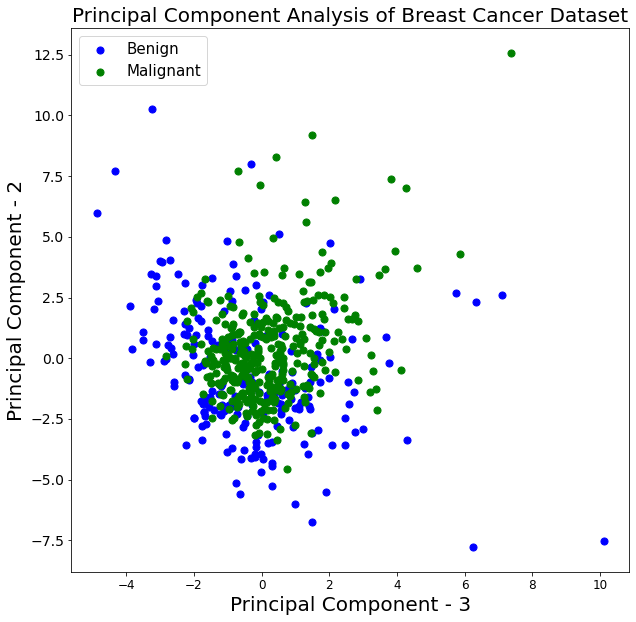

In [42]:
# Let's consider PC-2 and PC-3; PC-2 remains on the y-axis.

plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 3', fontsize = 20)
plt.ylabel('Principal Component - 2', fontsize = 20)
plt.title('Principal Component Analysis of Breast Cancer Dataset', fontsize = 20)
targets = ['Benign', 'Malignant']
colors = ['b', 'g']

for target, color in zip(targets, colors):
    indicesToKeep = breast_dataset['label'] == target
    plt.scatter(principal_breast_df.loc[indicesToKeep, 'principal component 3'],principal_breast_df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt. legend(targets, prop={'size': 15})

Interesting. The two classes are fairly indistinguishable when considering components 2 and 3. 

<Figure size 432x288 with 0 Axes>

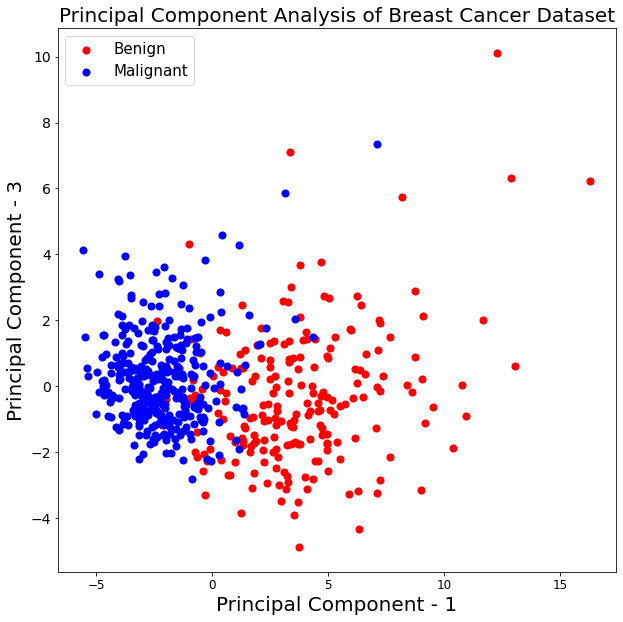

In [43]:
# Now, PC-1 and PC-3; here, I've retained PC-1 on the x-axis, as with the first plot.

plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1', fontsize = 20)
plt.ylabel('Principal Component - 3', fontsize = 20)
plt.title('Principal Component Analysis of Breast Cancer Dataset', fontsize = 20)
targets = ['Benign', 'Malignant']
colors = ['r', 'b']

for target, color in zip(targets, colors):
    indicesToKeep = breast_dataset['label'] == target
    plt.scatter(principal_breast_df.loc[indicesToKeep, 'principal component 1'],principal_breast_df.loc[indicesToKeep, 'principal component 3'], c = color, s = 50)

plt. legend(targets, prop={'size': 15})

This looks, unsurprisingly, similiar to the first panel. I'm not convinced that the addition of this third component is illuminating things further.  